# Overall

The introduction of the dataset: https://grouplens.org/datasets/movielens/

Download the dataset [here](http://files.grouplens.org/datasets/movielens/).

MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota. The data was collected through the MovieLens web site (m(https://movielens.org)) during the seven-month period from September 19th, 1997 through April 22nd, 1998.

# Dataset Statistics
#### There are 3 most-common datasets. 
The statistics summary of these 3 datasets is shown below.

| DatasetSize | ratings | movies | users | tags |
| :-----| :----: | :----: | :----: | ----: |
| ml-1m | 1,000,209 | 3,900 | 6,040 | None |
| ml-10m | 10,000,054 | 10,681 | 71,567 | 95,580 |
| ml-25m | 25,000,095 | 62,423 | 162,541 | 1,093,360 |

# File Structure

### RATINGS FILE DESCRIPTION

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

(1::1193::5::978300760)

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


### MOVIES FILE DESCRIPTION

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

(1::Toy Story (1995)::Animation|Children's|Comedy)

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist


### USERS FILE DESCRIPTION

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

(1::F::1::10::48067)

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"



### Tags File Structure
All tags are contained in the file tags.dat. Each line of this file represents one tag applied to one movie by one user, and has the following format:

UserID::MovieID::Tag::Timestamp

The lines within this file are ordered first by UserID, then, within user, by MovieID.

Tags are user generated metadata about movies. Each tag is typically a single word, or short phrase. The meaning, value and purpose of a particular tag is determined by each user.

# Data Visualization
We use ml-10M for visualization. 

This data set contains 10000054 ratings and 95580 tags applied to 10681 movies by 71567 users of the online movie recommender service MovieLens.

In [1]:
from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

import os,sys
import shutil
from glob import glob
sys.path.append('../')
from utils.downloader import *
from IPython.display import display

In [2]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

## Downloading and Loading data
There are three .dat data files: **movies.dat**, **ratings.dat** and **tags.dat**

- movies.dat: MovieID::Title::Genres
- ratings.dat: UserID::MovieID::Rating::Timestamp
- tags.dat: UserID::MovieID::Tag::Timestamp

The seperator is "::"

In [3]:
folderpath = '../dataset/ml-10M100K'
ML_10M = 'http://files.grouplens.org/datasets/movielens/ml-10m.zip'
if os.path.isdir(folderpath) and len(glob(os.path.join(folderpath, '*'))) == 6:
    logging.info('Data exists. No need to download again.')
else:
    logging.info('Data folder incomplete. Download again.')
    shutil.retree(folderpath)
    downloader = Downloader()
    logging.info('Starting downloading...')
    downloader.run(ML_10M, '../dataset/','zip')

01:42:51 INFO:Data exists. No need to download again.


In [4]:
file_list = ['movies.dat', 'ratings.dat', 'tags.dat']
cols_list = ["MovieID::Title::Genres", "UserID::MovieID::Rating::Timestamp", "UserID::MovieID::Tag::Timestamp"]
df_list = {}
for file_type, cols in zip(file_list, cols_list):
    file_name = file_type.split('.')[0]
    cols_name = cols.split("::")
    df = pd.read_csv(os.path.join(folderpath, file_type), sep = "::", header=None, engine='python', \
                  names=cols_name)
    if file_name == 'movies':
        df['Year'] = df['Title'].str.extract('.*\((.*)\).*',expand = False).astype(int)
    df_list[file_name] = df
    print('There are %d lines in %s. Each line has %d fileds: %s' % (df.shape[0], file_name, df.shape[1], cols))
    display(df.head())

There are 10681 lines in movies. Each line has 4 fileds: MovieID::Title::Genres


,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


There are 10000054 lines in ratings. Each line has 4 fileds: UserID::MovieID::Rating::Timestamp


,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


There are 95580 lines in tags. Each line has 4 fileds: UserID::MovieID::Tag::Timestamp


,UserID,MovieID,Tag,Timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


# Data Analysis
Here we will show the statistic of each type of the file.
## movies file

In [5]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [6]:
#number of unique movies
data = df_list['movies']
display(data.head())
for col in data.columns:
    col_value = data[col].unique().tolist()
    print('%s has %d unqiue values.' % (col, len(col_value)))
    
genres_list = set(reduce(lambda x,y : x + y, \
                        map(lambda x: x.split('|'), data['Genres'].tolist())))
print('Unique genres num %d' % len(genres_list))

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


MovieID has 10681 unqiue values.
Title has 10680 unqiue values.
Genres has 797 unqiue values.
Year has 94 unqiue values.
Unique genres num 20


In [7]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'Genres', genres_list)
dum

{'Thriller': 1706,
 'Drama': 5339,
 'Children': 528,
 'IMAX': 29,
 'Horror': 1013,
 'Western': 275,
 'Animation': 286,
 'Romance': 1685,
 'Fantasy': 543,
 '(no genres listed)': 1,
 'Sci-Fi': 754,
 'Crime': 1118,
 'Action': 1473,
 'Mystery': 509,
 'War': 511,
 'Film-Noir': 148,
 'Comedy': 3703,
 'Documentary': 482,
 'Adventure': 1025,
 'Musical': 436}

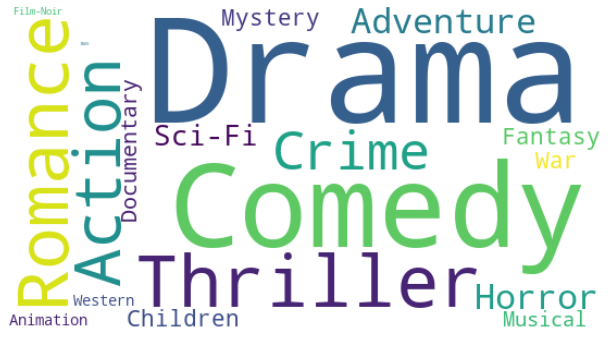

In [8]:
#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

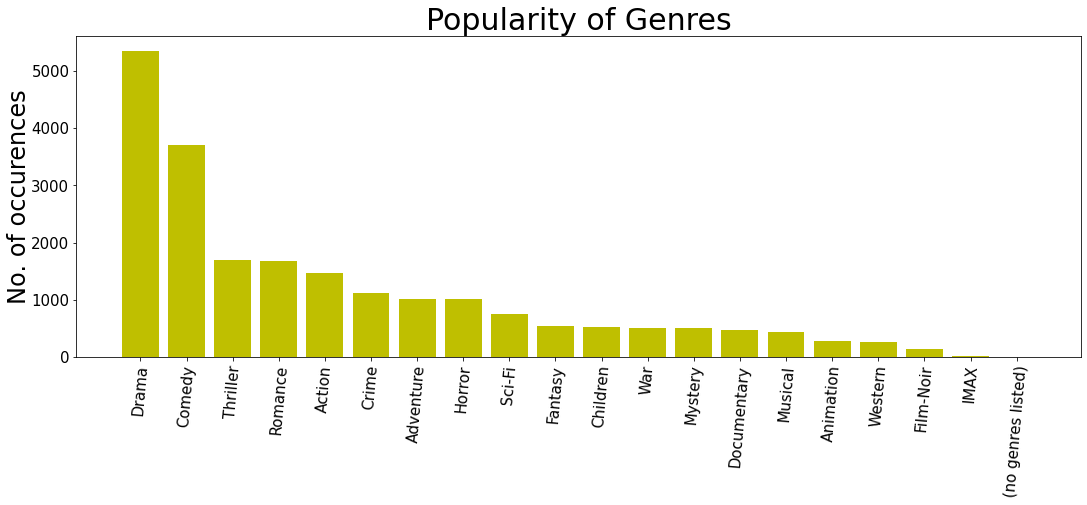

In [9]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='y')
plt.title("Popularity of Genres", fontsize = 30)
plt.show()

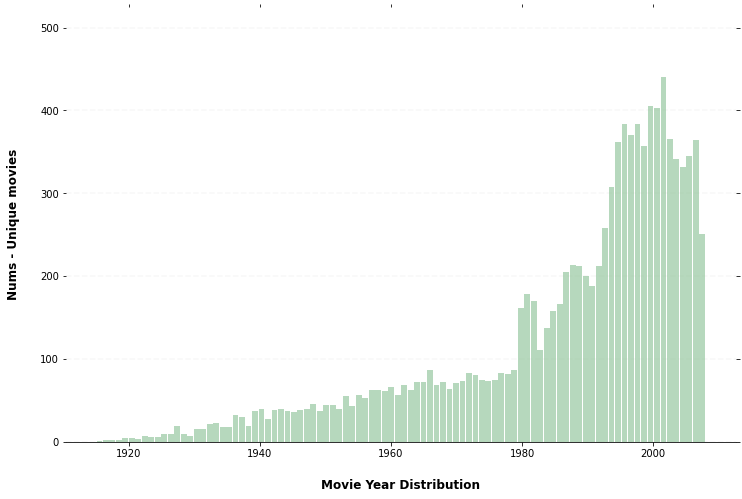

In [10]:
ax = data.hist(column='Year',bins=len(data['Year'].unique().tolist()), alpha=0.6, grid=False,figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Movie Year Distribution", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Nums - Unique movies", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## ratings file

In [11]:
data = df_list['ratings']
display(data.head())
for col in data.columns:
    col_value = data[col].unique().tolist()
    print('%s has %d unqiue values.' % (col, len(col_value)))

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


UserID has 69878 unqiue values.
MovieID has 10677 unqiue values.
Rating has 10 unqiue values.
Timestamp has 7096905 unqiue values.


In [12]:
display(data.describe())
print('The rating score is from %f to %f' % (data['Rating'].min(), data['Rating'].max()))

,UserID,MovieID,Rating,Timestamp
count,1.000005e+07,1.000005e+07,1.000005e+07,1.000005e+07
mean,3.586986e+04,4.120291e+03,3.512422e+00,1.032606e+09
std,2.058534e+04,8.938402e+03,1.060418e+00,1.159640e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812300e+04,6.480000e+02,3.000000e+00,9.467659e+08
50%,3.574050e+04,1.834000e+03,4.000000e+00,1.035476e+09
75%,5.360800e+04,3.624000e+03,4.000000e+00,1.126749e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


The rating score is from 0.500000 to 5.000000


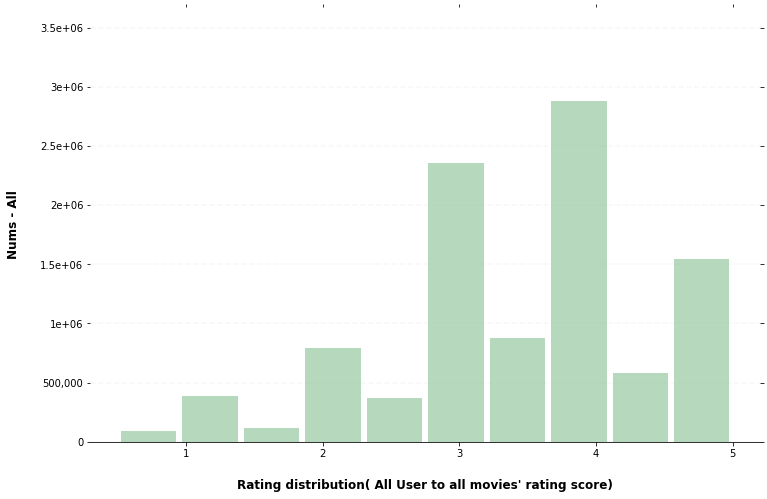

In [13]:
ax = data.hist(column='Rating',bins=len(data['Rating'].unique().tolist()), alpha=0.6, grid=False,figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Rating distribution( All User to all movies' rating score)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Nums - All", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

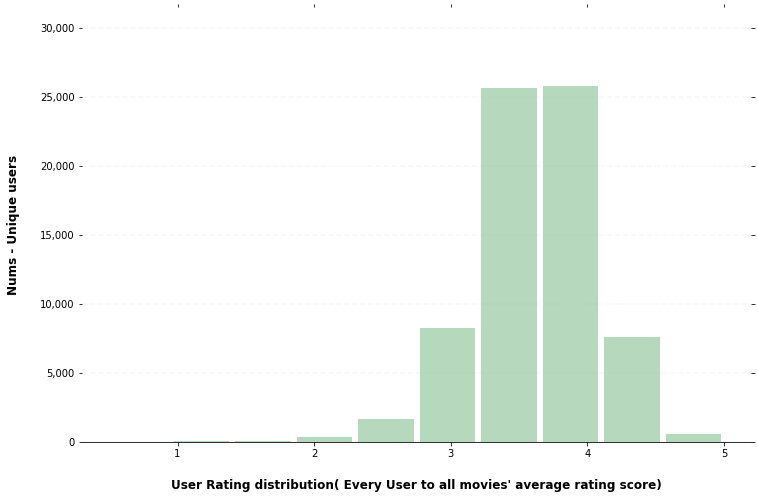

In [14]:
ax = data.groupby('UserID').mean().hist(column='Rating',bins=len(data['Rating'].unique().tolist()), alpha=0.6, grid=False,figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("User Rating distribution( Every User to all movies' average rating score)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Nums - Unique users", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

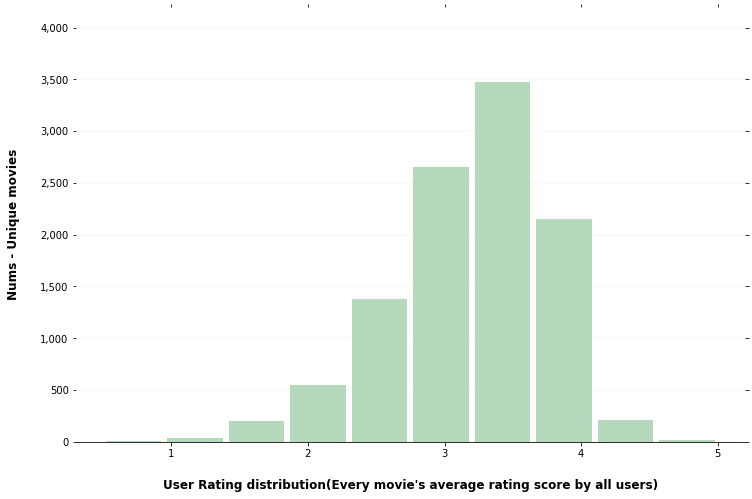

In [15]:
ax = data.groupby('MovieID').mean().hist(column='Rating',bins=len(data['Rating'].unique().tolist()), alpha=0.6, grid=False,figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("User Rating distribution(Every movie's average rating score by all users)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Nums - Unique movies", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))